In [1]:
from omegaconf import OmegaConf
from datasets import load_data
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

config = OmegaConf.load("./configs/default_config_linearprobe50.yaml")

for dataset in [ 'flowers-102',  ]: # 'uc-merced-land-use-dataset'
                # 'kvasir-dataset'
                # 'stanford_cars',
                #'caltech101', 'dtd', 'eurosat' ,
                # 'fgvc-aircraft-2013b', 'oxford-iiit-pet'
                #'Imagenette' ]:
    
    config.dataset = dataset
    train_dataset, val_dataset, test_dataset, N, train_transform, transform = load_data(False, config, common_corruption=True)

#     print(dataset, len(train_dataset), len(val_dataset), len(test_dataset),  N)
# train_dataset = datasets.DTD(root='./data', split='train', download=False)

/home/mheuillet/Desktop/robust_training/.venv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-09 16:48:39,594	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-09 16:48:39,705	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-09 16:48:39,802	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Processing image: <class 'str'>


IndexError: Replacement index 0 out of range for positional args tuple

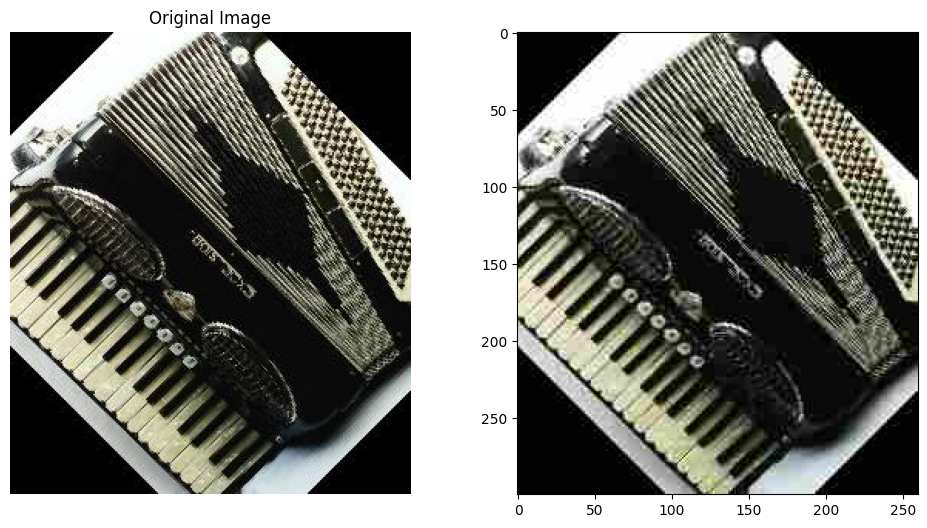

In [33]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from imagecorruptions import corrupt

SAFE_CORRUPTIONS = [
    # "gaussian_noise",
    "shot_noise",
    "impulse_noise",
    "defocus_blur",
    # "glass_blur",
    "motion_blur",
    "zoom_blur",
    "snow",
    # "frost",
    "fog",
    # "brightness",
    "contrast",
    "elastic_transform",
    "pixelate",
    "jpeg_compression"
]

severity = 3
corruptio = SAFE_CORRUPTIONS[10]

# Get list of image file paths from the ./data directory (adjust extension as needed)
image_paths = glob.glob(os.path.join("./data/caltech101/101_ObjectCategories/accordion", "image_0001.jpg"))
# You can also include other extensions:
# image_paths = glob.glob(os.path.join("./data", "*.[jp][pn]g"))

if not image_paths:
    print("No images found in ./data")
else:
    # For demonstration, let's process the first image
    img_path = image_paths[0]

    print("Processing image:", type(img_path) )
    
    # Open the image and ensure it's in RGB format
    img = Image.open(img_path).convert("RGB")

    if isinstance(img, Image.Image):
        img = np.array(img)

    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)  # Convert from [0,1] to [0,255] range
    
    # Apply the transformation
    transformed_img_array = corrupt(img, severity, corruptio)
    transformed_img = Image.fromarray(transformed_img_array)
    
    # Visualize original and transformed images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    axes[1].imshow(transformed_img)
    axes[1].set_title("Transformed {}".format() )
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()

In [3]:
testloader = DataLoader(test_dataset, 
                        batch_size=2, 
                        num_workers=1,
                        pin_memory=True )
        
for i, (inputs, labels) in enumerate(testloader):
    print(inputs.shape, labels)

torch.Size([2, 3, 224, 224]) tensor([28, 37])
torch.Size([2, 3, 224, 224]) tensor([53, 10])
torch.Size([2, 3, 224, 224]) tensor([49, 50])
torch.Size([2, 3, 224, 224]) tensor([97, 97])
torch.Size([2, 3, 224, 224]) tensor([72, 97])
torch.Size([2, 3, 224, 224]) tensor([93, 77])
torch.Size([2, 3, 224, 224]) tensor([46,  3])
torch.Size([2, 3, 224, 224]) tensor([20, 72])
torch.Size([2, 3, 224, 224]) tensor([50, 77])
torch.Size([2, 3, 224, 224]) tensor([40, 89])
torch.Size([2, 3, 224, 224]) tensor([94, 59])
torch.Size([2, 3, 224, 224]) tensor([34, 72])
torch.Size([2, 3, 224, 224]) tensor([76, 80])
torch.Size([2, 3, 224, 224]) tensor([18, 83])
torch.Size([2, 3, 224, 224]) tensor([60, 83])
torch.Size([2, 3, 224, 224]) tensor([51, 95])
torch.Size([2, 3, 224, 224]) tensor([54, 56])
torch.Size([2, 3, 224, 224]) tensor([ 7, 40])
torch.Size([2, 3, 224, 224]) tensor([ 65, 100])
torch.Size([2, 3, 224, 224]) tensor([55, 11])
torch.Size([2, 3, 224, 224]) tensor([93, 17])
torch.Size([2, 3, 224, 224]) ten

In [3]:


# Path to your unzipped Kvasir dataset
dataset_root = '/home/mheuillet/Desktop/robust_training/data/kvasir_dataset_unzipped/kvasir-dataset'

# Define any transforms you need (e.g., resizing, normalization, etc.)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # or some other size
    transforms.ToTensor(),
    # Optional: transforms.Normalize(mean, std),
])

# Create an ImageFolder dataset
kvasir_dataset = datasets.ImageFolder( root=dataset_root, transform=data_transforms )

# Check the classes that ImageFolder identified
print("Classes found:", kvasir_dataset.classes)
# e.g. ["dyed-lifted-polyps", "dyed-resection-margins", ...]
# Each subfolder is assigned a class index in alphabetical order

# Create a DataLoader for batching
dataloader = DataLoader(kvasir_dataset, batch_size=32, shuffle=True, num_workers=4)

# Iterate over a few batches to verify it works
for images, labels in dataloader:
    print("Batch images shape:", images.shape)
    print("Batch labels shape:", labels.shape)
    break  # Just show the first batch, then stop




Classes found: ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
Batch images shape: torch.Size([32, 3, 224, 224])
Batch labels shape: torch.Size([32])


In [ ]:
### don't pay attention to this cell

# EuroSAT: seulement 8 runs on complete et tous les autres OOM
# Caltech: 26 runs ok, 
# Stanford Cars: 34 ok
# Aircraft: 26 ok
# DTD : 26 ok
# Oxford pet: 26 ok
# Flowers: 26 ok

stanford_cars = 6922 + 1222 + 8041 
caltech101 = 5899 + 1042 + 1736 
dtd = 1880 + 1880 + 1880 
eurosat = 18360 + 3240 + 5400 
fgvcaircraft2013b =  3334 + 3333 + 3333 
flowers102 = 1020 + 1020 + 6149 
oxfordiiitpet = 3128 + 552 + 3669 

print(eurosat, caltech101, dtd, fgvcaircraft2013b, flowers102, oxfordiiitpet, stanford_cars)

from PIL import Image
import torchvision.datasets as datasets

# Initialize the Caltech101 dataset without transformations
caltech101_sample = datasets.Caltech101(root='./data', download=False)
print(len(caltech101_sample))
for i in range( len(caltech101_sample) ) :
    image, label = caltech101_sample[i]

    # Check the image mode
    # print(f"Image Mode: {image.mode}")  # Expected: 'RGB'
    if image.mode != 'RGB':
        print('issue')